In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
#Loading Data
dx = load_dataset('lukebarousse/data_jobs')
dataFrame = dx['train'].to_pandas()
#Clean Up Data
dataFrame["job_posted_date"] = pd.to_datetime(dataFrame["job_posted_date"])
dataFrame["job_skills"] = dataFrame["job_skills"].apply(lambda skill_job: ast.literal_eval(skill_job) if pd.notna(skill_job) else [])

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\USER\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Feb  6 02:20:56 2025).


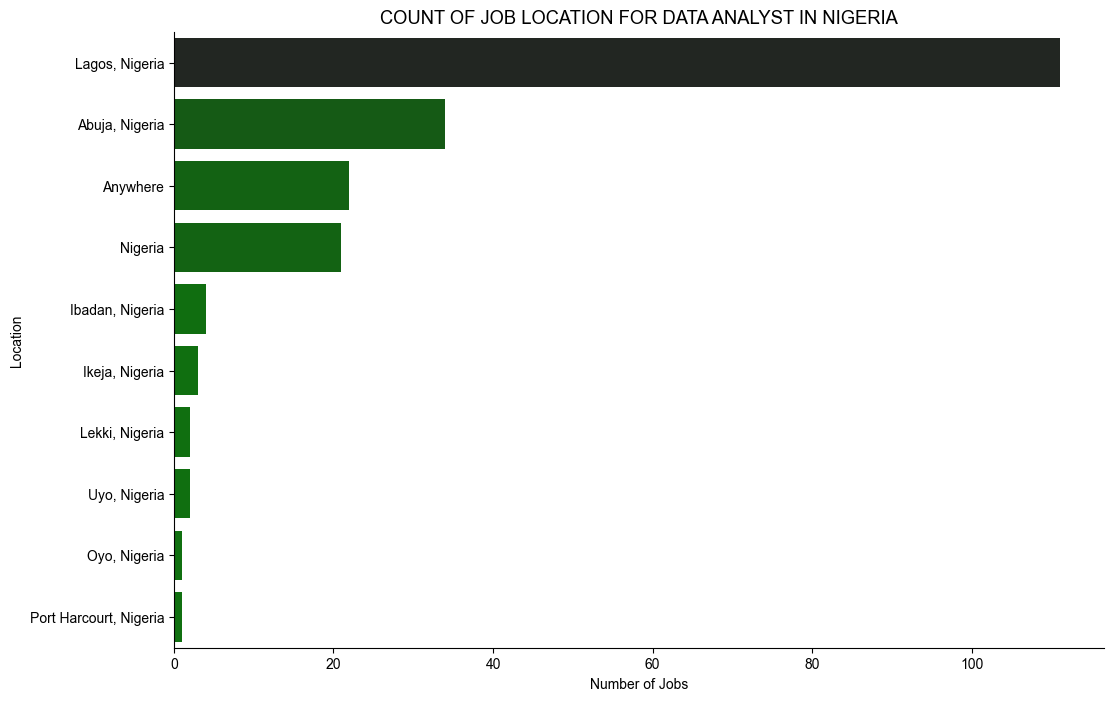

In [2]:
Nigeria_dataFrame_for_DTANLs = dataFrame[(dataFrame["job_title_short"] == "Data Scientist") & (dataFrame["job_country"] == "Nigeria")].copy()
Ind_Df_plot = Nigeria_dataFrame_for_DTANLs["job_location"].value_counts().head(10).to_frame()
plt.figure(figsize=(12,8))
sns.barplot(data=Ind_Df_plot, x="count", y="job_location", hue="count", palette="dark:green_r", legend=False)
sns.set_theme(style="whitegrid", palette="dark", font="serif", font_scale=1.1)
sns.despine()
plt.title("count of job location for data analyst in Nigeria".upper())
plt.ylabel(ylabel="Location")
plt.xlabel("Number of Jobs")
plt.show()

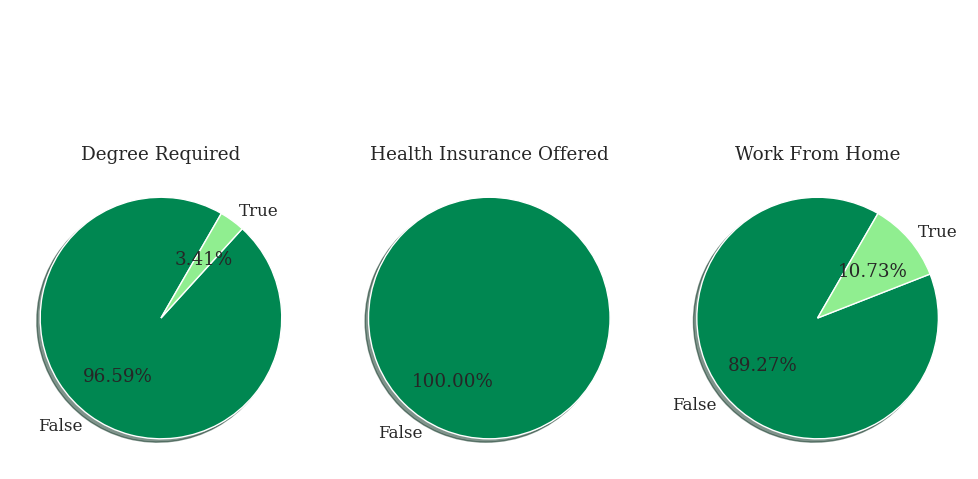

In [3]:
df_dict = {
    "job_no_degree_mention":"Degree Required", 
    "job_health_insurance":"Health Insurance Offered", 
    "job_work_from_home":"Work From Home"
}
fig, ax = plt.subplots(1,3)
for indx, (colom, titl) in enumerate(df_dict.items()):
    labels = Nigeria_dataFrame_for_DTANLs[colom].value_counts().index
    ax[indx].pie(Nigeria_dataFrame_for_DTANLs[colom].value_counts(),labels=labels, startangle=60, autopct="%1.2f%%", colors=["#008751","lightgreen"], shadow=True)
    ax[indx].set_title(titl)
fig.suptitle(" ".title())
fig.set_size_inches(w=10,h=6)
fig.tight_layout()
#it is workink fig.savefig(fname="sns.jpg")
plt.show()

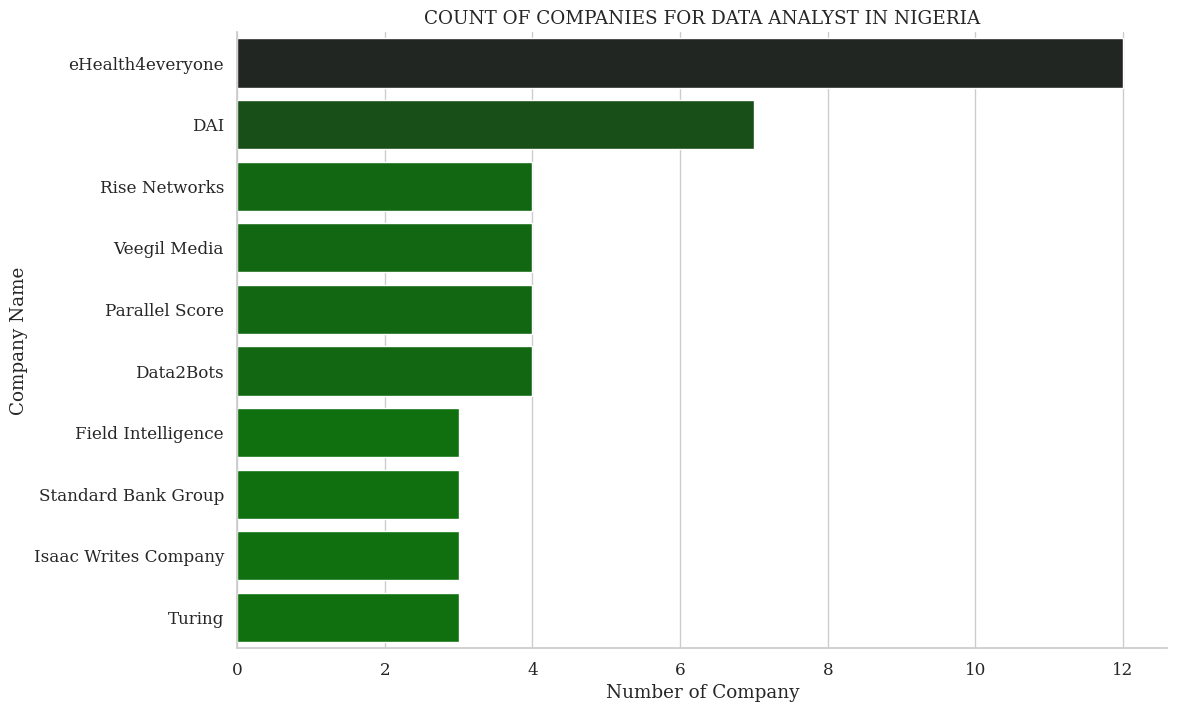

In [4]:
Nigeria_dataFrame_for_DTANLs = dataFrame[(dataFrame["job_title_short"] == "Data Scientist") & (dataFrame["job_country"] == "Nigeria")].copy()
Ind_Df_plot = Nigeria_dataFrame_for_DTANLs["company_name"].value_counts().head(10).to_frame()
plt.figure(figsize=(12,8))
sns.barplot(data=Ind_Df_plot, x="count", y="company_name", hue="count", palette="dark:green_r", legend=False)
sns.set_theme(style="whitegrid", palette="dark", font="serif", font_scale=1.1)
sns.despine()
plt.title("count of companies for data analyst in Nigeria".upper())
plt.ylabel(ylabel="Company Name")
plt.xlabel("Number of Company")
plt.show()